In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('aviation_data.csv')
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09-01-2023,8:30 AM,09-01-2023,10:45 AM,American Airlines,15.0
1,DL5678,09-01-2023,1:15 PM,09-01-2023,3:30 PM,Delta,5.0
2,UA9101,09-01-2023,5:00 PM,09-01-2023,7:15 PM,United Airlines,25.0
3,AA1234,09-01-2023,8:30 AM,09-01-2023,10:45 PM,American Airlines,30.0
4,DL5678,09-02-2023,2:00 PM,09-02-2023,4:10 PM,Delta,NaN
5,UA9101,09-02-2023,5:00 PM,09-02-2023,7:15 PM,United Airlines,20.0
6,AA1234,09-02-2023,8:30 PM,09-03-2023,10:45 AM,American Airlines,60.0
7,DL5678,09-03-2023,1:00 PM,09-03-2023,3:30 PM,Delta,10.0
8,UA9101,09-03-2023,3:00 PM,09-03-2023,5:20 PM,United Airlines,NaN
9,AA1234,09-03-2023,8:30 AM,09-03-2023,10:00 AM,American Airlines,15.0


In [3]:
# Convert 'DepartureDate' and 'ArrivalDate' to 'YYYY-MM-DD' format
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'], format='%m-%d-%Y')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%m-%d-%Y')

# Convert 'DepartureTime' and 'ArrivalTime' to 24-hour time format
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'], format='%I:%M %p').dt.time
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%I:%M %p').dt.time

# Display cleaned data for verification
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,NaN
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,NaN
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0


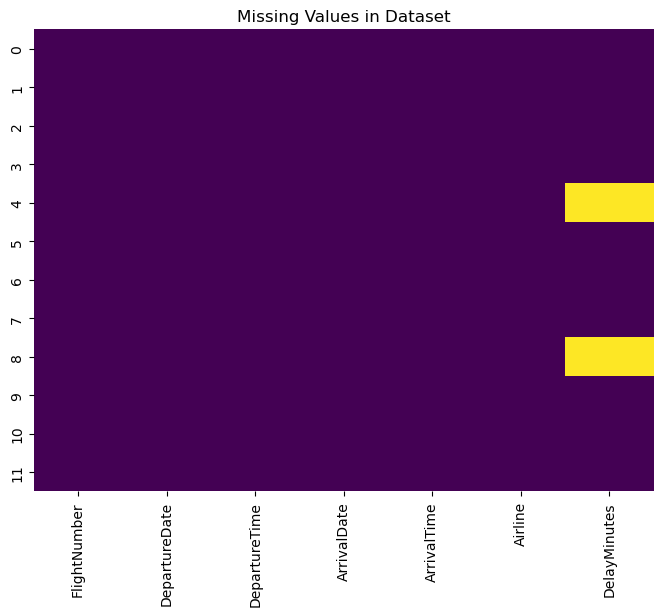

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

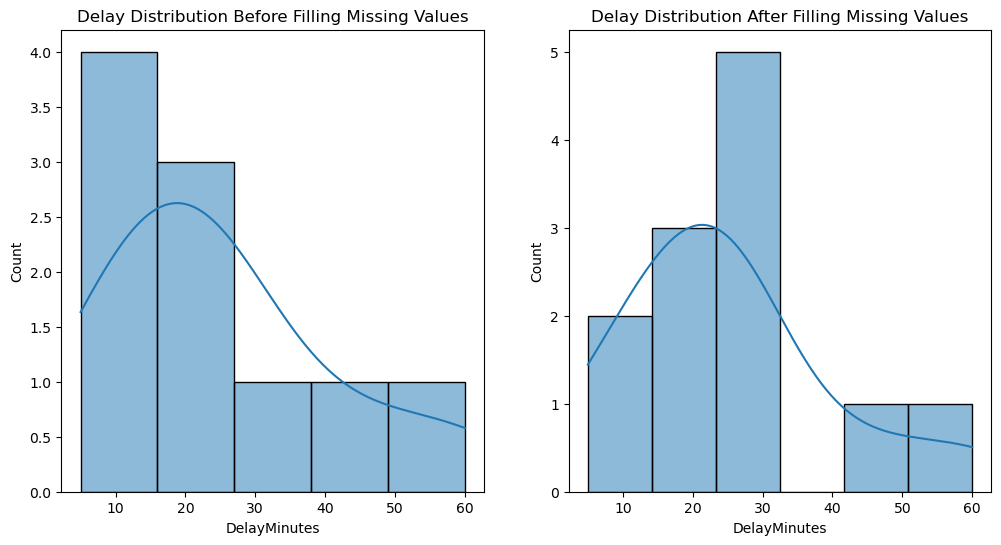

In [7]:
# Plot before and after handling missing values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['DelayMinutes'], kde=True)
plt.title('Delay Distribution Before Filling Missing Values')

# Fill missing values
df.fillna({'DelayMinutes': df['DelayMinutes'].mean()}, inplace=True)

plt.subplot(1, 2, 2)
sns.histplot(df['DelayMinutes'], kde=True)
plt.title('Delay Distribution After Filling Missing Values')

plt.show()

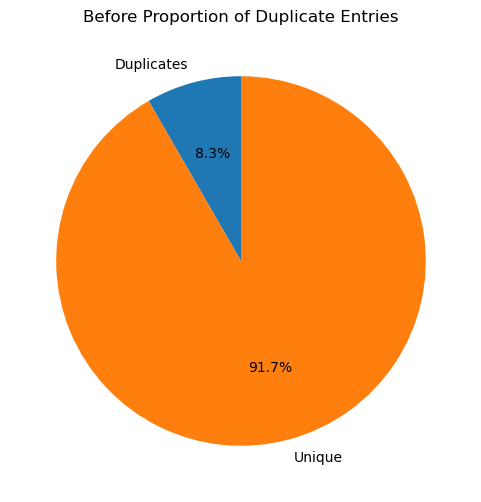

In [9]:
# Count the number of duplicate entries
duplicates = df.duplicated(subset=['FlightNumber', 'DepartureDate', 'DepartureTime']).sum()

plt.figure(figsize=(6, 6))
plt.pie([duplicates, len(df) - duplicates], labels=['Duplicates', 'Unique'], autopct='%1.1f%%', startangle=90)
plt.title("Before Proportion of Duplicate Entries")
plt.show()

In [11]:
# Remove duplicate flight entries
df.drop_duplicates(subset=['FlightNumber', 'DepartureDate', 'DepartureTime'], inplace=True)

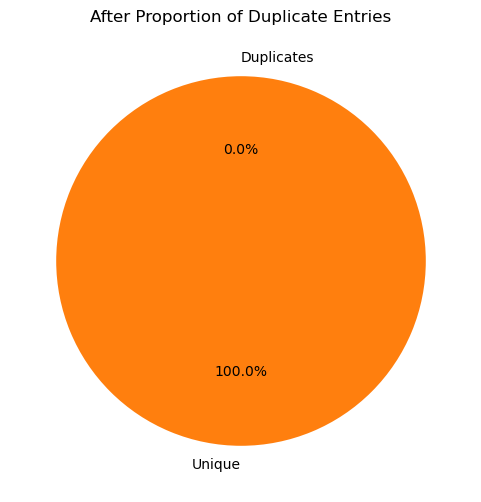

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,25.0
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0
10,DL5678,2023-09-04,12:30:00,2023-09-04,14:40:00,Delta,25.0


In [13]:
# Count the number of duplicate entries
duplicates = df.duplicated(subset=['FlightNumber', 'DepartureDate', 'DepartureTime']).sum()

plt.figure(figsize=(6, 6))
plt.pie([duplicates, len(df) - duplicates], labels=['Duplicates', 'Unique'], autopct='%1.1f%%', startangle=90)
plt.title("After Proportion of Duplicate Entries")
plt.show()
df

In [15]:
# Create datetime columns for departure and arrival times by combining dates and times
df['DepartureDateTime'] = pd.to_datetime(df['DepartureDate'].astype(str) + ' ' + df['DepartureTime'].astype(str))
df['ArrivalDateTime'] = pd.to_datetime(df['ArrivalDate'].astype(str) + ' ' + df['ArrivalTime'].astype(str))

# Filter out entries where ArrivalTime is earlier than DepartureTime
df = df[df['ArrivalDateTime'] > df['DepartureDateTime']]
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0,2023-09-02 14:00:00,2023-09-02 16:10:00
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,25.0,2023-09-03 15:00:00,2023-09-03 17:20:00
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00
10,DL5678,2023-09-04,12:30:00,2023-09-04,14:40:00,Delta,25.0,2023-09-04 12:30:00,2023-09-04 14:40:00


In [17]:
# Calculate Flight Duration in minutes
df['FlightDuration'] = (df['ArrivalDateTime'] - df['DepartureDateTime']).dt.total_seconds() / 60
print(df[['FlightNumber', 'DepartureDateTime', 'ArrivalDateTime', 'FlightDuration']])
df

   FlightNumber   DepartureDateTime     ArrivalDateTime  FlightDuration
0        AA1234 2023-09-01 08:30:00 2023-09-01 10:45:00           135.0
1        DL5678 2023-09-01 13:15:00 2023-09-01 15:30:00           135.0
2        UA9101 2023-09-01 17:00:00 2023-09-01 19:15:00           135.0
4        DL5678 2023-09-02 14:00:00 2023-09-02 16:10:00           130.0
5        UA9101 2023-09-02 17:00:00 2023-09-02 19:15:00           135.0
6        AA1234 2023-09-02 20:30:00 2023-09-03 10:45:00           855.0
7        DL5678 2023-09-03 13:00:00 2023-09-03 15:30:00           150.0
8        UA9101 2023-09-03 15:00:00 2023-09-03 17:20:00           140.0
9        AA1234 2023-09-03 08:30:00 2023-09-03 10:00:00            90.0
10       DL5678 2023-09-04 12:30:00 2023-09-04 14:40:00           130.0
11       UA9101 2023-09-04 19:00:00 2023-09-04 21:15:00           135.0


,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime,FlightDuration
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00,135.0
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00,135.0
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00,135.0
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0,2023-09-02 14:00:00,2023-09-02 16:10:00,130.0
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00,135.0
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00,855.0
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00,150.0
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,25.0,2023-09-03 15:00:00,2023-09-03 17:20:00,140.0
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00,90.0
10,DL5678,2023-09-04,12:30:00,2023-09-04,14:40:00,Delta,25.0,2023-09-04 12:30:00,2023-09-04 14:40:00,130.0


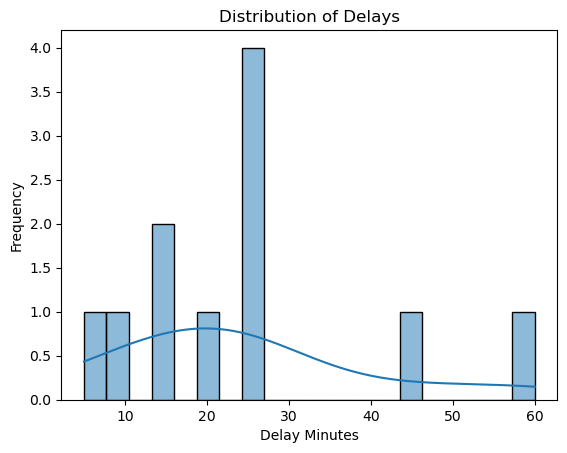

In [19]:
# Distribution of Delays
import matplotlib.pyplot as plt
import seaborn as sns

# Plot delay distribution
sns.histplot(df['DelayMinutes'], bins=20, kde=True)
plt.title('Distribution of Delays')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.show()

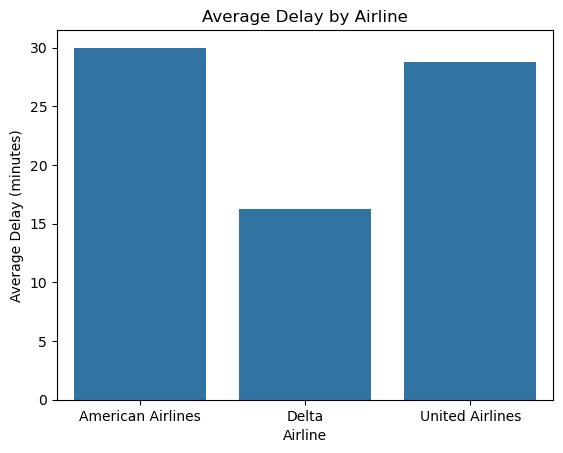

In [21]:
# Group by airline and calculate average delay
airline_delays = df.groupby('Airline')['DelayMinutes'].mean().reset_index()

# Plot average delay by airline
sns.barplot(x='Airline', y='DelayMinutes', data=airline_delays)
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.show()

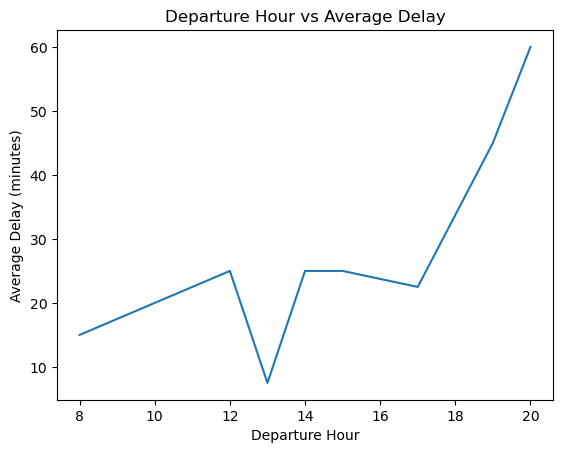

In [23]:
# Ensure DepartureTime is a string type
df['DepartureTime'] = df['DepartureTime'].astype(str)

# Convert DepartureTime to hours as integers
df['DepartureHour'] = df['DepartureTime'].str.split(':').str[0].astype(int)

# Calculate average delay per departure hour
avg_delay = df.groupby('DepartureHour')['DelayMinutes'].mean().reset_index()

# Plotting
sns.lineplot(x='DepartureHour', y='DelayMinutes', data=avg_delay)
plt.title('Departure Hour vs Average Delay')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay (minutes)')
plt.show()

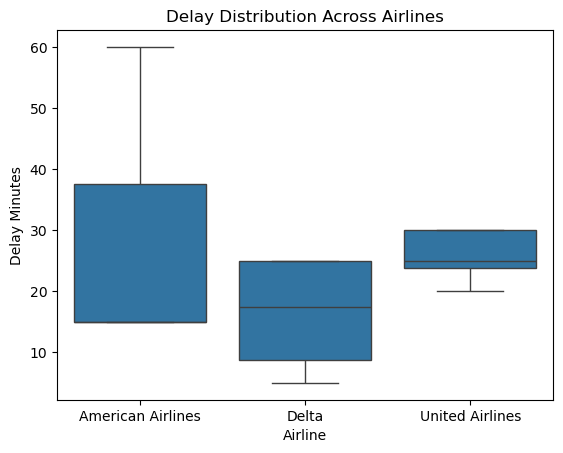

In [25]:
# Boxplot to compare delays between airlines
sns.boxplot(x='Airline', y='DelayMinutes', data=df, showfliers=False)
plt.title('Delay Distribution Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Delay Minutes')
plt.show()

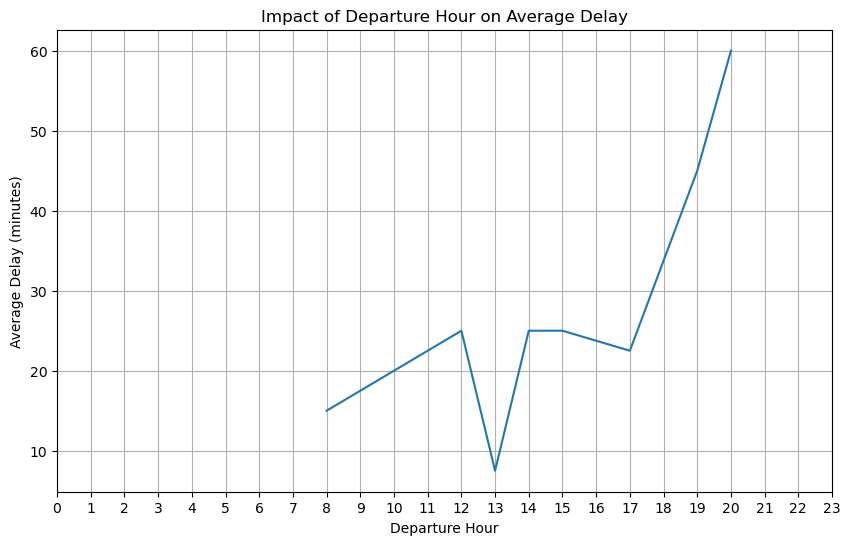

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean delay for each departure hour
avg_delay_by_hour = df.groupby('DepartureHour')['DelayMinutes'].mean().reset_index()

# Plot: Departure Hour vs Average Delay
plt.figure(figsize=(10, 6))
sns.lineplot(x='DepartureHour', y='DelayMinutes', data=avg_delay_by_hour)
plt.title('Impact of Departure Hour on Average Delay')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(True)
plt.show()

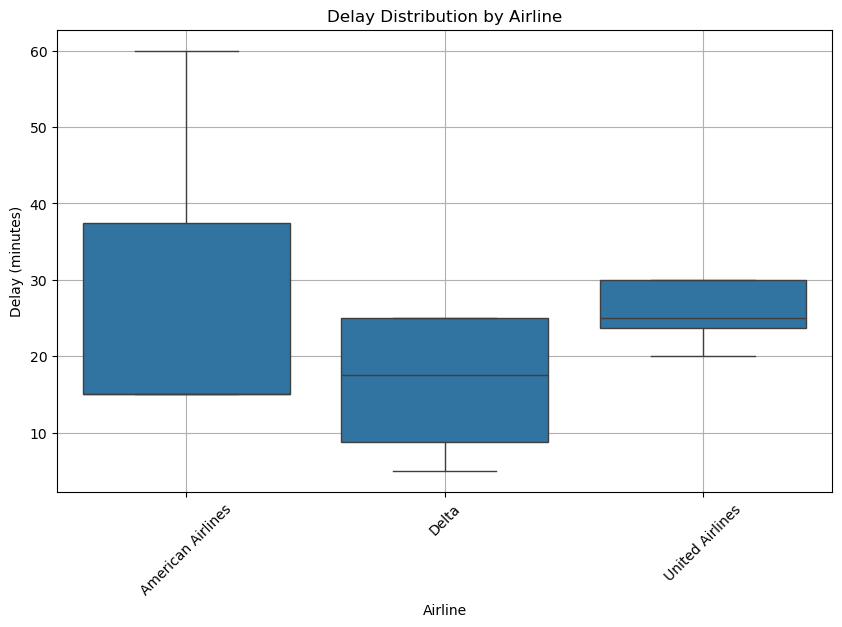

In [29]:
# Compare Delay Distributions Between Airlines
# Plot: Delay Distribution by Airline
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='DelayMinutes', data=df, showfliers=False)
plt.title('Delay Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

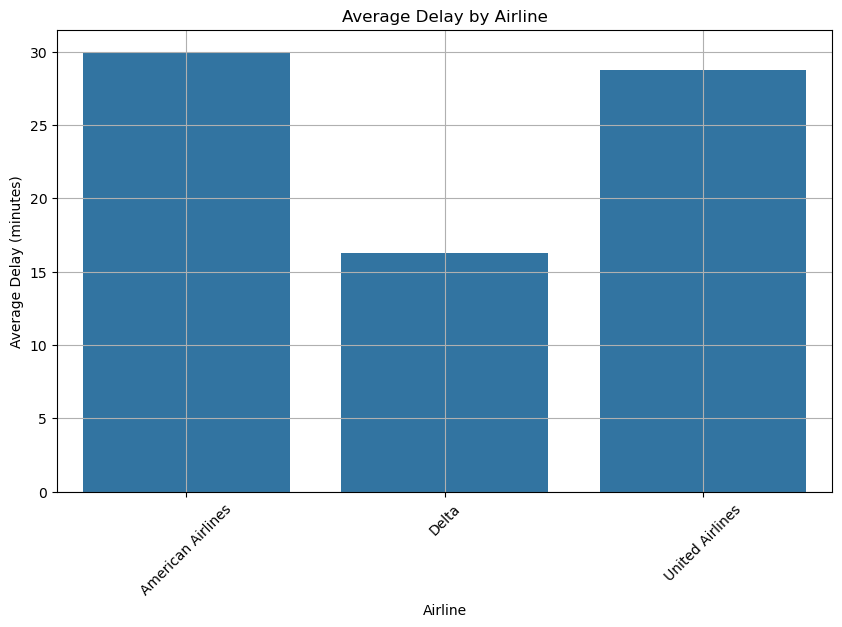

In [31]:
# Visualize the Average Delay by Airline and Delay Distribution
# Calculate average delay per airline
avg_delay_airline = df.groupby('Airline')['DelayMinutes'].mean().reset_index()

# Plot: Average Delay by Airline
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='DelayMinutes', data=avg_delay_airline)
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
# Summary statistics
summary_stats = df.describe()

# Count delays per airline
delays_per_airline = df.groupby('Airline')['DelayMinutes'].count()

# Mean delay per airline
mean_delay_airline = df.groupby('Airline')['DelayMinutes'].mean()

# Summary of key findings
print("Summary of Key Findings:")
print(summary_stats)
print("\nDelays per Airline:")
print(delays_per_airline)
print("\nMean Delay per Airline (minutes):")
print(mean_delay_airline)

Summary of Key Findings:
                       DepartureDate                    ArrivalDate  \
count                             11                             11   
mean   2023-09-02 08:43:38.181818112  2023-09-02 10:54:32.727272704   
min              2023-09-01 00:00:00            2023-09-01 00:00:00   
25%              2023-09-01 12:00:00            2023-09-01 12:00:00   
50%              2023-09-02 00:00:00            2023-09-03 00:00:00   
75%              2023-09-03 00:00:00            2023-09-03 00:00:00   
max              2023-09-04 00:00:00            2023-09-04 00:00:00   
std                              NaN                            NaN   

       DelayMinutes              DepartureDateTime  \
count     11.000000                             11   
mean      24.545455  2023-09-02 23:06:49.090908928   
min        5.000000            2023-09-01 08:30:00   
25%       15.000000            2023-09-02 03:30:00   
50%       25.000000            2023-09-02 20:30:00   
75%       2

In [35]:
df.to_csv('cleaned_aviation_data.csv', index=False)
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime,FlightDuration,DepartureHour
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00,135.0,8
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00,135.0,13
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00,135.0,17
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0,2023-09-02 14:00:00,2023-09-02 16:10:00,130.0,14
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00,135.0,17
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00,855.0,20
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00,150.0,13
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,25.0,2023-09-03 15:00:00,2023-09-03 17:20:00,140.0,15
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00,90.0,8
10,DL5678,2023-09-04,12:30:00,2023-09-04,14:40:00,Delta,25.0,2023-09-04 12:30:00,2023-09-04 14:40:00,130.0,12
